# Object Detection  - YOLO & OWL-ViT
This tutorial demonstrates how to use YOLO (You Only Look Once) from the [Ultralytics](https://github.com/ultralytics/yolov5) library for object detection. It includes steps for:

- Running object detection inference on images/videos
- Fine-tuning YOLO for custom datasets
- Comparing YOLO with OWl-VIT for zero-shot learning.


## 1. Perform Object Detection Inference
First thing We'll use YOLOv8 from Ultralyics for object detection on a sample image.
We aim to utilize the pre-trained YOLOv8 model to detect objects in a sample image. This involves loading the model, providing an image for input, and interpreting the model's predictions.

**Key Concepts:**
- **Inference**: The process of using a trained model to make predictions on new data.
- **YOLOv8**: A state-of-the-art version of the YOLO (You Only Look Once) architecture, known for its speed and accuracy in object detection tasks.

**Steps:**
1. Load the YOLOv8 model using the Ultralytics library.
2. Perform inference on a sample image to detect objects.
3. Visualize the results, including bounding boxes and class labels.

**Support Material:**
- https://docs.ultralytics.com/models/yolov8/
- https://docs.ultralytics.com/tasks/detect/

In [ ]:
# Import YOLO and load a pre-trained model
from ultralytics import YOLO
import cv2

# Load the YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')  # nano model for quick inference

# Run inference on a sample image

results = model('images/street_scene.jpg', save = False)  # Displays image with detections 
#True umstellen um es zu sichern
# speicherort ändern: results = model.predict("images/example_signature.jpg", conf=0.5, save=True, project="custom_results", name="my_detection"). 
# Bsp speicherort: custom_results/my_detection/
# project="dein_ordner" - Hauptordner für die Ergebnisse
# Name="subfolder" - Unterordner innerhalb von project

for result in results:
    print(result.boxes)  # Boxes object for bounding box outputs

#cls: jede erkennung hat eine klasse --> cls = klasse
#conf ist die sicherheit wie sicher der output ist
#data = ist in den dokumentationen ersichtlich : -->  1. 4 daten sind ecken des rechtecks auf dem bild, 5 ist die conf und 6 ist  di cls


image 1/1 /workspaces/MultimodalInteraction_ObjDet/images/street_scene.jpg: 384x640 13 persons, 1 bicycle, 9 cars, 2 motorcycles, 1 traffic light, 1 bench, 4 birds, 1 handbag, 1 potted plant, 368.5ms
Speed: 13.7ms preprocess, 368.5ms inference, 50.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 2.,  0.,  0.,  0., 58.,  0.,  2.,  9.,  0., 14.,  0.,  3.,  0.,  1.,  2., 14., 14.,  2.,  0.,  2.,  2.,  0.,  0., 26.,  0.,  3.,  2.,  0.,  0.,  2., 14., 13.,  2.])
conf: tensor([0.9098, 0.9041, 0.9005, 0.8934, 0.8477, 0.8331, 0.8173, 0.7737, 0.7585, 0.7313, 0.6779, 0.6606, 0.6198, 0.5686, 0.5105, 0.5057, 0.5043, 0.4675, 0.4564, 0.4517, 0.4201, 0.4165, 0.4037, 0.4015, 0.3767, 0.3745, 0.3659, 0.3221, 0.3095, 0.3049, 0.2999, 0.2989, 0.2811])
data: tensor([[9.5592e-01, 3.6429e+02, 6.0592e+02, 6.1893e+02, 9.0984e-01, 2.0000e+00],
        [1.1789e+03, 4.2397e+02, 1.4806e+03, 8.6406e+02, 

## 2. Fine-Tuning YOLO on Custom Dataset
Fine-tuning YOLO requires a dataset formatted in the YOLO format. We'll use a small public dataset for demonstration.
We will adapt the pre-trained YOLO model to a custom dataset. This process, known as fine-tuning, enables YOLO to specialize in detecting specific objects not included in its original training.

**Key Concepts:**
- **Fine-tuning**: Adapting a pre-trained model to new data by continuing the training process.
- **Custom Dataset**: A dataset that contains specific objects relevant to a new application, different from those YOLO was trained on (e.g. https://docs.ultralytics.com/datasets/detect/signature/.) Does it work? yes, no? why not? what can you do?

**Steps:**
1. Prepare the custom dataset by organizing images and labels in the required format.
2. Configure the YOLO training pipeline.
3. Train the model and evaluate its performance.

**Support Material:** 
- https://docs.ultralytics.com/modes/train/
- https://docs.ultralytics.com/modes/val/




In [ ]:
# Download a sample dataset (e.g., Signature)
# !wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/signature.zip
# !unzip -q signature.zip -d ./datasets

In [ ]:
# Train YOLO on the dataset
results = model.train(data='./datasets/signature.yaml', epochs=10, imgsz=640, batch=4) 
# epoches=anzahl --> durchlaufe alles  images, 
# imgsz=640 --> muss aiusgewäjlt werden weil yolo nur mit der grösse funktioniert. Die funktion macht automatisch das resizing, 
# batch=4 --> sagt wie viele Bilder por packet ins systemg eschickt wird, bevor die parameter angepasst werden. 

# Pause drücken damit nicht zu lange ist wen Batch zu tief gewählt wurde

In [ ]:
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model, check the path depending on your output before!!

# Predict with the model
results = model.predict("images/example_signature.jpg", conf=0.5, save= False) #check params if you need to improve detection --> confindentailiti sit die warscheinlichekit das er es findet.

# print as prediction
for result in results:
    print(result.boxes)


image 1/1 /workspaces/MultimodalInteraction_ObjDet/images/example_signature.jpg: 640x480 1 signature, 112.4ms
Speed: 3.5ms preprocess, 112.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.5565])
data: tensor([[1.6597e+03, 2.2540e+03, 2.5078e+03, 2.7601e+03, 5.5648e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (4032, 3024)
shape: torch.Size([1, 6])
xywh: tensor([[2083.7234, 2507.0474,  848.0597,  506.1880]])
xywhn: tensor([[0.6891, 0.6218, 0.2804, 0.1255]])
xyxy: tensor([[1659.6935, 2253.9534, 2507.7532, 2760.1414]])
xyxyn: tensor([[0.5488, 0.5590, 0.8293, 0.6846]])


## 3. Zero-Shot Learning with OWL-ViT
Switch to `OWL-ViT` to see how it performs with zero-shot learning capabilities. Zero-shot means detecting objects without prior specific training.

OWL-ViT (Open Vocabulary Learning with Vision Transformers) is a cutting-edge model designed for open vocabulary object detection. Unlike traditional models, OWL-ViT combines vision transformers with text embeddings, enabling it to:\n\n
- Understand textual descriptions of objects, even if it hasn't seen them during training.
- Detect and classify objects based on descriptive input, making it suitable for diverse applications.
- Perform zero-shot learning by generalizing to new object classes without additional training.\n\n"

**Steps in Using OWL-ViT:**
1. Model Initialization**: Set up the OWL-ViT model.
2. Text Input for Object Descriptions: Provide descriptive prompts (e.g., 'a red car' or 'a black cat to guide detection.
3. Inference and Visualization: Process an image or video, detect objects based on text descriptions and visualize results.\n\n"

OWL-ViT excels in scenarios where predefined object classes are insufficient, such as detecting rare or domain-specific objects.

**Support Material**:
- https://huggingface.co/docs/transformers/en/model_doc/owlvit


Detected windows with confidence 0.109 at location [-3.98, 2.44, 628.43, 393.58]
Detected windows with confidence 0.112 at location [176.62, 10.74, 268.25, 108.74]
Detected windows with confidence 0.101 at location [39.81, 101.7, 133.26, 207.86]
Detected windows with confidence 0.101 at location [483.43, 113.1, 551.13, 190.09]
Detected windows with confidence 0.126 at location [185.12, 141.51, 273.63, 228.72]
Detected windows with confidence 0.102 at location [303.91, 166.51, 375.52, 245.83]
Detected a church  with confidence 0.116 at location [706.68, 35.65, 870.62, 342.14]
Detected a person on the floor with confidence 0.119 at location [1265.73, 347.33, 1309.63, 423.22]
Detected a person on the floor with confidence 0.144 at location [729.04, 301.7, 873.73, 509.65]
Detected a person on the floor with confidence 0.109 at location [932.93, 316.24, 1046.45, 524.26]
Detected a person on the floor with confidence 0.144 at location [1084.81, 326.57, 1179.79, 470.67]
Detected a person on t

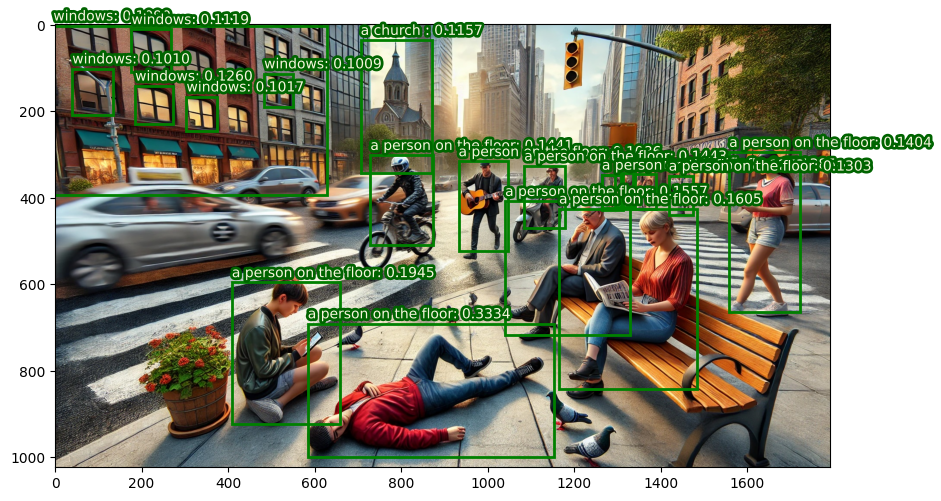

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from PIL import Image
import torch

from transformers import OwlViTProcessor, OwlViTForObjectDetection

image = Image.open("images/street_scene.jpg")

processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")


text_labels = [["a person on the floor", "a church ", "windows"]] #Imput bestimmen, was analysiert werden soll

inputs = processor(text=text_labels, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.tensor([(image.height, image.width)])

# Convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
results = processor.post_process_grounded_object_detection(
    outputs=outputs, target_sizes=target_sizes, threshold=0.1, text_labels=text_labels
)
# Retrieve predictions for the first image for the corresponding text queries
result = results[0]
boxes, scores, text_labels = result["boxes"], result["scores"], result["text_labels"]

for box, score, text_label in zip(boxes, scores, text_labels):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text_label} with confidence {round(score.item(), 3)} at location {box}")


def show_box(box, ax):
    print(box)
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(
        plt.Rectangle((x0, y0), w, h, edgecolor="green", facecolor=(0, 0, 0, 0), lw=2)
    )


def show_boxes_and_labels_on_image(raw_image, boxes, labels, scores):
    plt.figure(figsize=(10, 10))
    plt.imshow(raw_image)
    for i, box in enumerate(boxes):
        box = [round(i, 2) for i in box.tolist()]
        show_box(box, plt.gca())
        plt.text(
            x=box[0],
            y=box[1] - 12,
            s=f"{labels[i]}: {scores[i]:,.4f}",
            c="beige",
            path_effects=[pe.withStroke(linewidth=4, foreground="darkgreen")],
        )
    plt.axis("on")
    plt.show()
    #lt.savefig("streetscene_with_detections.jpg")



# Show the image with the bounding boxes
show_boxes_and_labels_on_image(
    image,
    boxes,
    text_labels,
    scores
)
